In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [6]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

#### 1. Prepare the data

In [3]:
x_data = datasets.load_boston().data[:, 12] # 주변 이웃 중 하위 계층의 비율
y_data = datasets.load_boston().target # 집의 가격 (in $1,000s)

#### 2. Build the model

In [4]:
_x_data = tf.reshape(x_data, [len(x_data), 1])

In [7]:
W = tf.Variable(tf.random_normal([1, 5], dtype=tf.float64)) # [ # of x's columns, # of nodes in 1st hidden layer ]
W_out = tf.Variable(tf.random_normal([5, 1], dtype=tf.float64)) # [ # of previous W's columns, # of y's columns ]

In [8]:
hidden = tf.nn.sigmoid(tf.matmul(_x_data, W))
output = tf.matmul(hidden, W_out)

#### 3. Set the criterion

In [9]:
loss = tf.reduce_mean(tf.square(output - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.001)
train = optimizer.minimize(loss)

#### 4. Train the model

In [10]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) 

    for step in range(50000):
        sess.run(train)
        if step % 5000 == 0:
            print('Step {} || Loss : {}'.format(step, sess.run(loss)))

    output = sess.run(output) 

Step 0 || Loss : 548.436813016188
Step 5000 || Loss : 84.43139608791465
Step 10000 || Loss : 84.4283129581425
Step 15000 || Loss : 84.42656049318849
Step 20000 || Loss : 84.42541527132504
Step 25000 || Loss : 84.42460235876678
Step 30000 || Loss : 84.42399265608688
Step 35000 || Loss : 84.42351696456132
Step 40000 || Loss : 84.42313463749595
Step 45000 || Loss : 84.42282013438496


#### 5. Visualize trained model

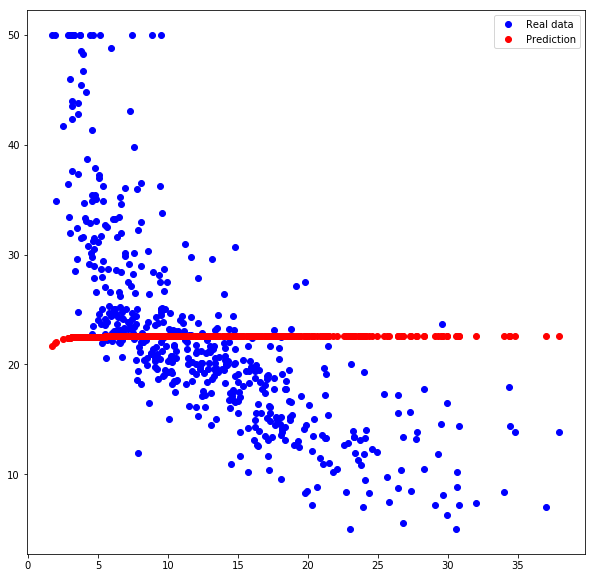

In [11]:
plt.figure(figsize = (10,10))
plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, output, 'ro', label='Prediction')
plt.legend()
plt.show()